<a href="https://colab.research.google.com/github/jcmachicao/curso_ai_salud/blob/master/MLH_arboldecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Machine Learning for Healthcare**
---
# **Introducción a Modelos de Clasificación y Predicción**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2021
* Actualizado: 2021_10_11


## Librerías externas necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Carga de base de datos

In [7]:
ruta = 'drive/My Drive/2020 Cursos/2020 AI Salud/Curso ML Salud/'
os.listdir(ruta)

['ai_salud_ML_002.xlsx']

In [48]:
data = pd.read_excel(ruta + 'ai_salud_ML_002.xlsx')
data = data.drop(['id'], axis=1)
data.head()

,fiebre,tos,edad,aseo,sexo,patologia
0,Si,No,13,4,F,Negativa
1,No,No,8,5,F,Negativa
2,Si,Si,12,2,F,Positiva
3,No,No,14,3,M,Negativa
4,Si,Si,14,5,F,Positiva


## Intuición gráfica acerca de la predicción

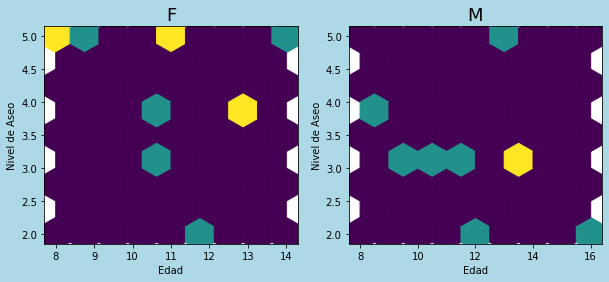

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), facecolor='lightblue')
clasificador = 'sexo'

for j, item in enumerate(data[clasificador].unique()):
  #print(j, item)
  datax = data[data[clasificador] == item]
  #print(datax)
  axs[j].hexbin(datax.edad, datax.aseo, gridsize=8)
  axs[j].set_xlabel('Edad')
  axs[j].set_ylabel('Nivel de Aseo')
  axs[j].set_title(item, fontsize=18)

plt.show()

## Modelo por Arbol de Decisiones

In [50]:
#@title Librerías Específicas de Modelamiento
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [51]:
data.patologia.unique()

array(['Negativa', 'Positiva'], dtype=object)

In [52]:
data100 = pd.get_dummies(data, drop_first=True)
data100

,edad,aseo,fiebre_Si,tos_Si,sexo_M,patologia_Positiva
0,13,4,1,0,0,0
1,8,5,0,0,0,0
2,12,2,1,1,0,1
3,14,3,0,0,1,0
4,14,5,1,1,0,1
5,10,3,0,0,1,0
6,11,3,1,1,0,1
7,9,3,0,1,1,0
8,11,5,1,0,0,0
9,16,2,0,1,1,1


In [53]:
modelo = DecisionTreeClassifier(max_depth=3, random_state=0)

In [54]:
X = data100.drop(['patologia_Positiva'], axis=1)
y = data100.patologia_Positiva

In [55]:
modelo.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [56]:
y_pred = modelo.predict(X)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=uint8)

In [57]:
data['tipo_pred'] = y_pred
data

,fiebre,tos,edad,aseo,sexo,patologia,tipo_pred
0,Si,No,13,4,F,Negativa,0
1,No,No,8,5,F,Negativa,0
2,Si,Si,12,2,F,Positiva,1
3,No,No,14,3,M,Negativa,0
4,Si,Si,14,5,F,Positiva,1
5,No,No,10,3,M,Negativa,0
6,Si,Si,11,3,F,Positiva,1
7,No,Si,9,3,M,Negativa,0
8,Si,No,11,5,F,Negativa,0
9,No,Si,16,2,M,Positiva,1


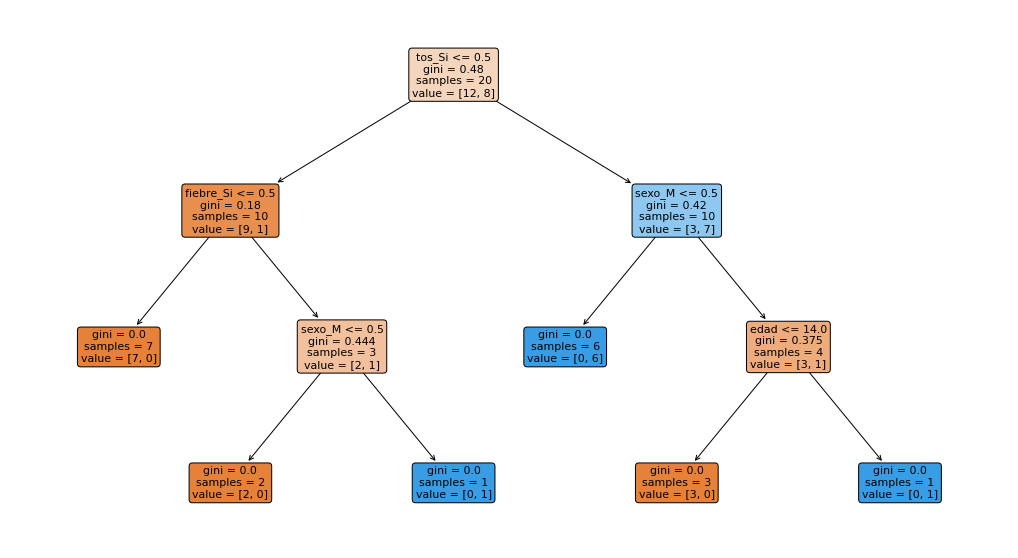

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(modelo, rounded=True, fontsize=11, label='all', filled=True, feature_names=X.columns)
plt.show()

In [59]:
X.head()

,edad,aseo,fiebre_Si,tos_Si,sexo_M
0,13,4,1,0,0
1,8,5,0,0,0
2,12,2,1,1,0
3,14,3,0,0,1
4,14,5,1,1,0


## Ejemplo
* Digamos que llega una declaración de un adulto masculino de 40 años a las 5 de la mañana registrado por un efectivo en la calle.
* También una mujer de 65 años declara de manera personal en una comisaría hacia las 4pm.


In [62]:
X_ts = np.array([
                 [11, 2, 1, 1, 0], 
                 [11, 2, 1, 1, 1]
                 ])
X_ts

array([[11,  2,  1,  1,  0],
       [11,  2,  1,  1,  1]])

In [63]:
y_ts = modelo.predict(X_ts)
y_ts

array([1, 0], dtype=uint8)